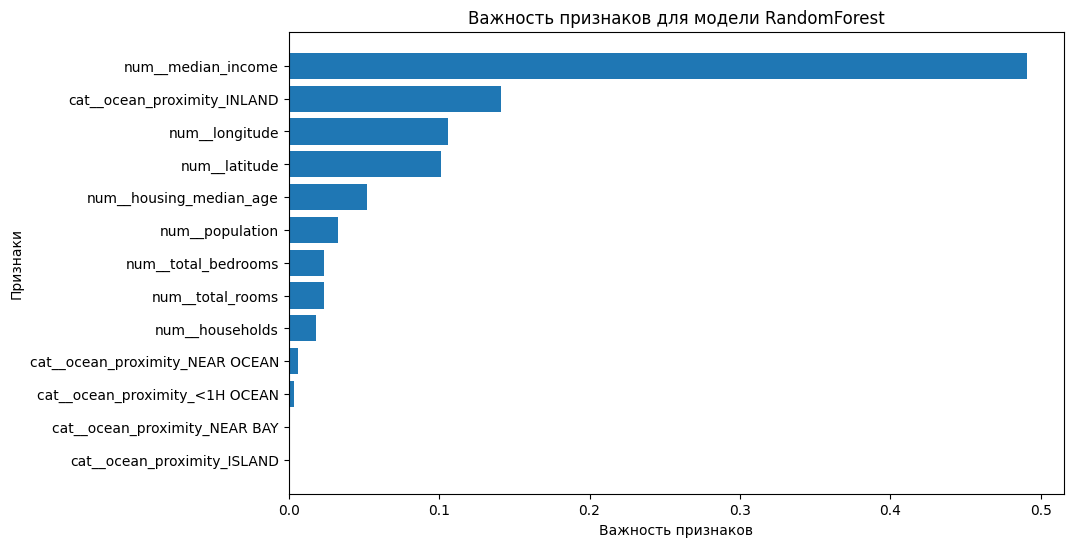

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Загружаем модель
with open("model.pkl", "rb") as file:
    model = pickle.load(file)

# Получаем список признаков
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Получаем важность признаков
importances = model.named_steps['regressor'].feature_importances_

# Создаём DataFrame для визуализации
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Строим график
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Важность признаков для модели RandomForest')
plt.gca().invert_yaxis()  # Чтобы самые важные признаки были наверху
plt.show()


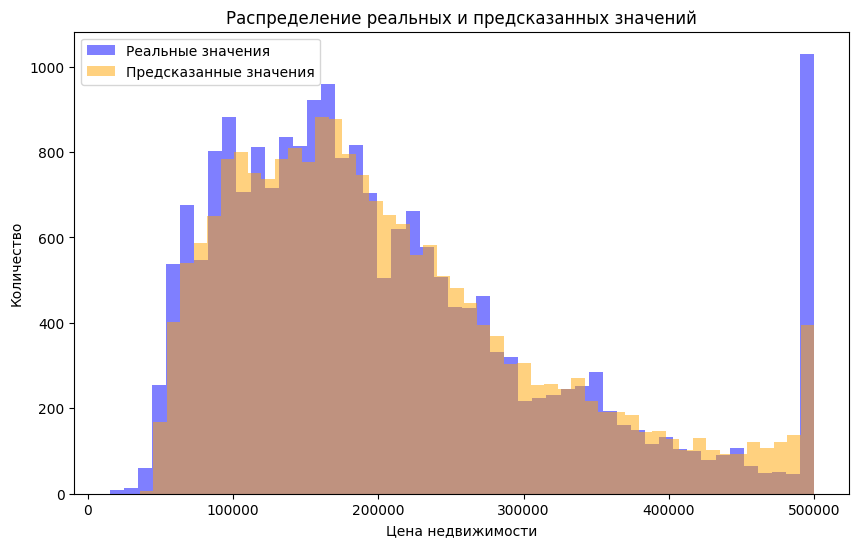

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Загружаем модель
with open("model.pkl", "rb") as file:
    model = pickle.load(file)

# Загружаем данные (тот же датасет, который использовался при обучении)
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

# Подготовка данных
X = df.drop(columns=["median_house_value"])
y_actual = df["median_house_value"]

# Предсказание значений
y_predicted = model.predict(X)

# Построение графика распределения
plt.figure(figsize=(10, 6))

# Гистограмма реальных значений
plt.hist(y_actual, bins=50, alpha=0.5, label='Реальные значения', color='blue')

# Гистограмма предсказанных значений
plt.hist(y_predicted, bins=50, alpha=0.5, label='Предсказанные значения', color='orange')

plt.xlabel('Цена недвижимости')
plt.ylabel('Количество')
plt.title('Распределение реальных и предсказанных значений')
plt.legend()
plt.show()
